In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph

from Helpers.graphing import plot_multiple_scatters
from rosey.graphing import plot_barplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

graph.style.use('fivethirtyeight')

# Red Wine

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
train, test = train_test_split(df)

print(train.shape, test.shape)
train.head()

(1199, 12) (400, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1303,8.0,0.280,0.44,1.8,0.081,28.0,68.0,0.99501,3.36,0.66,11.2,5
1197,7.7,0.570,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6
193,7.6,0.550,0.21,2.2,0.071,7.0,28.0,0.99640,3.28,0.55,9.7,5
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.99650,3.45,0.56,10.7,5
1393,8.0,0.520,0.25,2.0,0.078,19.0,59.0,0.99612,3.30,0.48,10.2,5


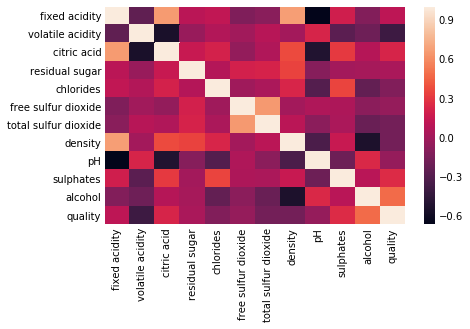

In [4]:
# Plot correlations
sns.heatmap(train.corr())
graph.show()

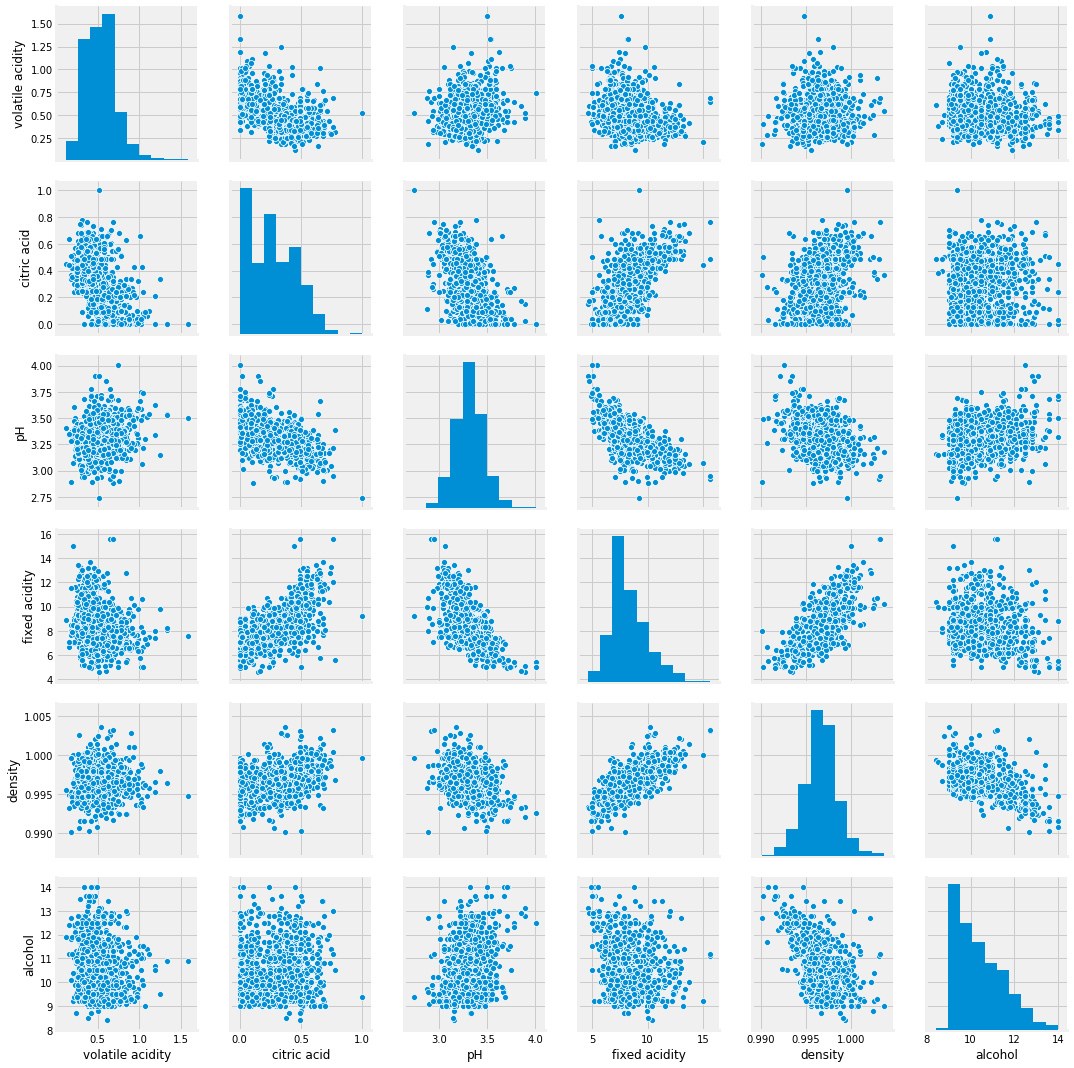

In [5]:
# Pairplot of the most correlated features
sns.pairplot(train[['volatile acidity', 'citric acid', 'pH', 'fixed acidity', 'density', 'alcohol']])
graph.show()

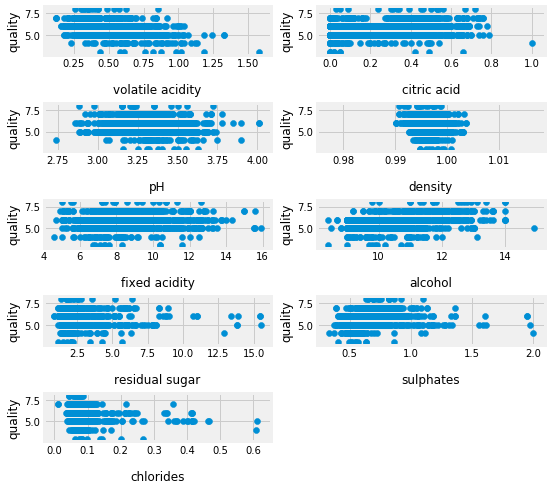

In [6]:
columns = ['volatile acidity', 'citric acid', 'pH', 'density', 'fixed acidity', 'alcohol', 'residual sugar', 'sulphates', 'chlorides']

plot_multiple_scatters(x_col_names=columns, y_col_names='quality', df=df)
graph.show()

In [30]:
# Train model

x =  train.drop('quality', axis='columns')
y = train['quality']

param_grid = {'n_estimators': [50, 100, 1000], 
              'min_samples_split': [5, 10],
              'max_features': [1, 2, 3, 5, 8, 10]
             }

model = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1)
model.fit(x, y)

print(model.best_params_)

{'max_features': 5, 'min_samples_split': 5, 'n_estimators': 100}

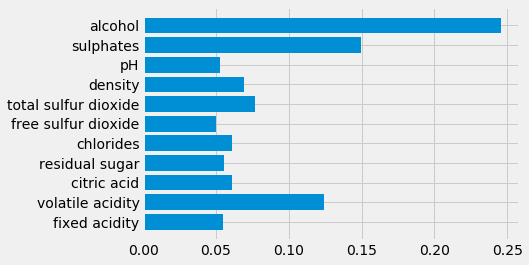

In [31]:
# Feature importances
feature_names = train.drop('quality', axis='columns').columns
feature_importance = model.best_estimator_.feature_importances_

plot_barplot(dict(zip(feature_names, feature_importance)))
graph.show()

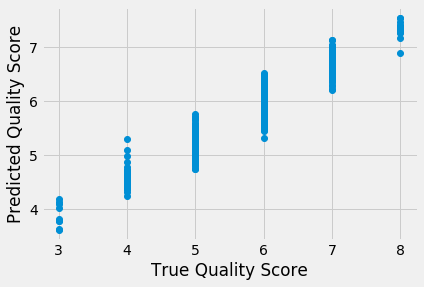

In [34]:
# How well does the model predict
pred = model.best_estimator_.predict(x)

graph.plot(y, pred, 'o')
graph.xlabel('True Quality Score')
graph.ylabel('Predicted Quality Score')
graph.show()

# White Wine

In [35]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
train, test = train_test_split(df)

print(train.shape, test.shape)
train.head()

(3673, 12) (1225, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4359,7.2,0.34,0.20,5.8,0.062,52.0,203.0,0.99461,3.17,0.44,9.8,6
43,6.6,0.24,0.27,1.4,0.057,33.0,152.0,0.99340,3.22,0.56,9.5,6
545,6.4,0.16,0.22,1.4,0.040,41.0,149.0,0.99330,3.49,0.58,10.0,6
1286,6.6,0.16,0.29,1.8,0.050,40.0,147.0,0.99120,3.06,0.44,11.4,7
3138,6.9,0.22,0.43,6.4,0.042,34.0,115.0,0.99293,3.05,0.51,10.8,6


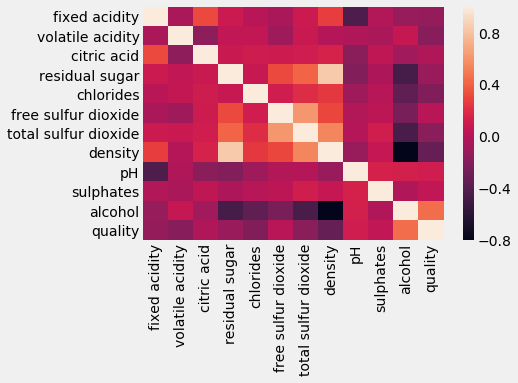

In [36]:
# Plot correlations
sns.heatmap(train.corr())
graph.show()

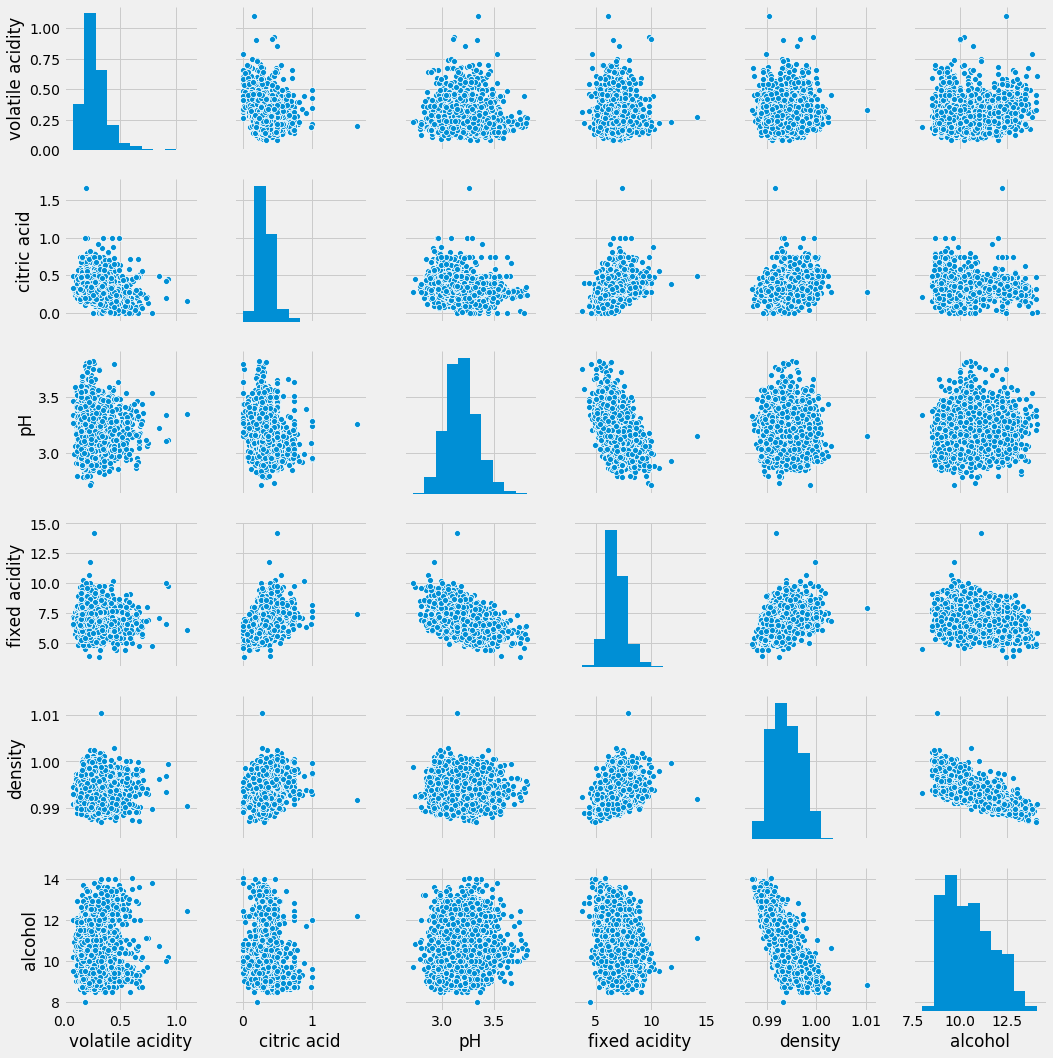

In [37]:
# Pairplot of the most correlated features
sns.pairplot(train[['volatile acidity', 'citric acid', 'pH', 'fixed acidity', 'density', 'alcohol']])
graph.show()

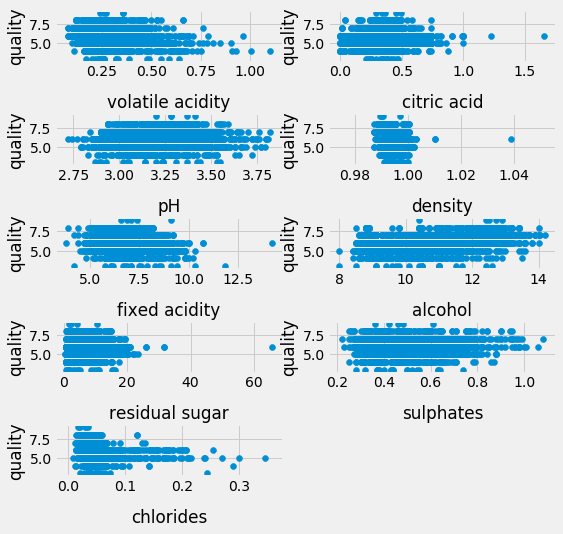

In [38]:
columns = ['volatile acidity', 'citric acid', 'pH', 'density', 'fixed acidity', 'alcohol', 'residual sugar', 'sulphates', 'chlorides']

plot_multiple_scatters(x_col_names=columns, y_col_names='quality', df=df)
graph.show()

In [39]:
# Train model

x =  train.drop('quality', axis='columns')
y = train['quality']

param_grid = {'n_estimators': [50, 100, 1000], 
              'min_samples_split': [5, 10],
              'max_features': [1, 2, 3, 5, 8, 10]
             }

model = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1)
model.fit(x, y)

print(model.best_params_)

{'max_features': 3, 'min_samples_split': 5, 'n_estimators': 1000}


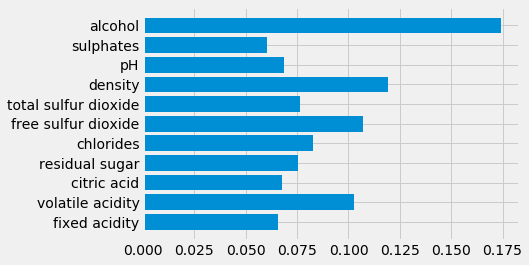

In [40]:
# Feature importances
feature_names = train.drop('quality', axis='columns').columns
feature_importance = model.best_estimator_.feature_importances_

plot_barplot(dict(zip(feature_names, feature_importance)))
graph.show()

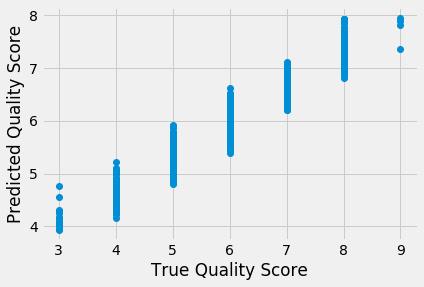

In [41]:
# How well does the model predict
pred = model.best_estimator_.predict(x)

graph.plot(y, pred, 'o')
graph.xlabel('True Quality Score')
graph.ylabel('Predicted Quality Score')
graph.show()